In [ ]:
# Clean Food Access Data
from google.colab import files
uploaded = files.upload()

Saving food_access.csv to food_access.csv


In [ ]:
import pandas as pd
df_fa = pd.read_csv("food_access.csv")

# Identify nulls in columns
print(df_fa.isnull().sum())

#Show column names
print(df_fa.columns)

County                                           0
Population                                       0
State                                            0
Housing Data.Residing in Group Quarters          0
Housing Data.Total Housing Units                 0
Vehicle Access.1 Mile                            0
Vehicle Access.1/2 Mile                          0
Vehicle Access.10 Miles                          0
Vehicle Access.20 Miles                          0
Low Access Numbers.Children.1 Mile               0
Low Access Numbers.Children.1/2 Mile             0
Low Access Numbers.Children.10 Miles             0
Low Access Numbers.Children.20 Miles             0
Low Access Numbers.Low Income People.1 Mile      0
Low Access Numbers.Low Income People.1/2 Mile    0
Low Access Numbers.Low Income People.10 Miles    0
Low Access Numbers.Low Income People.20 Miles    0
Low Access Numbers.People.1 Mile                 0
Low Access Numbers.People.1/2 Mile               0
Low Access Numbers.People.10 Mi

In [ ]:
# Drop duplicates
df_fa.drop_duplicates(inplace=True)

# Drop unnecessary columns
df_fa = df_fa.drop(columns=['Housing Data.Residing in Group Quarters','Housing Data.Total Housing Units',
                            'Low Access Numbers.Children.1 Mile','Low Access Numbers.Children.1/2 Mile',
                            'Low Access Numbers.Children.10 Miles','Low Access Numbers.Children.20 Miles',
                            'Low Access Numbers.Seniors.1 Mile','Low Access Numbers.Seniors.1/2 Mile',
                            'Low Access Numbers.Seniors.10 Miles','Low Access Numbers.Seniors.20 Miles'])

df_fa.head()

,County,Population,State,Vehicle Access.1 Mile,Vehicle Access.1/2 Mile,Vehicle Access.10 Miles,Vehicle Access.20 Miles,Low Access Numbers.Low Income People.1 Mile,Low Access Numbers.Low Income People.1/2 Mile,Low Access Numbers.Low Income People.10 Miles,Low Access Numbers.Low Income People.20 Miles,Low Access Numbers.People.1 Mile,Low Access Numbers.People.1/2 Mile,Low Access Numbers.People.10 Miles,Low Access Numbers.People.20 Miles
0,Autauga County,54571,Alabama,834.0,1045.0,222.0,0.0,12067.0,15518.0,2307.0,0.0,37424.0,49497.0,5119.0,0.0
1,Baldwin County,182265,Alabama,1653.0,2178.0,32.0,0.0,38848.0,48117.0,846.0,0.0,132442.0,165616.0,2308.0,0.0
2,Barbour County,27457,Alabama,545.0,742.0,201.0,0.0,9290.0,11901.0,2440.0,0.0,19007.0,23762.0,4643.0,0.0
3,Bibb County,22915,Alabama,312.0,441.0,0.0,0.0,6480.0,8349.0,102.0,0.0,17560.0,20989.0,365.0,0.0
4,Blount County,57322,Alabama,752.0,822.0,0.0,0.0,18188.0,19806.0,0.0,0.0,50848.0,54933.0,0.0,0.0


In [ ]:
# Clean Diabetes Atlas Data
from google.colab import files
uploaded = files.upload()

Saving DiabetesAtlasData.csv to DiabetesAtlasData.csv


In [ ]:
import pandas as pd
df_da = pd.read_csv("DiabetesAtlasData.csv")

# Identify nulls in columns
print(df_da.isnull().sum())

#Show column names
print(df_da.columns)

Zip Code                              0
County                                1
State                                 1
Diagnosed Diabetes-2021-Percentage    1
Overall SVI-2018-Percentile           1
dtype: int64
Index(['Zip Code', 'County', 'State', 'Diagnosed Diabetes-2021-Percentage',
       'Overall SVI-2018-Percentile'],
      dtype='object')


In [ ]:
# Deduplicate df_fa by taking the first occurrence or aggregating
df_fa = df_fa.groupby('County').first().reset_index()

# Deduplicate df_da similarly
df_da = df_da.groupby('County').first().reset_index()

print(f"Before merging Food Access and Diabetes: {df_fa.shape}")
print(f"Before merging Food Access and Diabetes: {df_da.shape}")

# Merge the Food Access data with the Diabetes data by 'County'
merged_df = df_fa.merge(df_da, on='County', how='inner')
print(f"After merging Food Access and Diabetes: {merged_df.shape}")

# Display the first few rows of the merged DataFrame
print(merged_df.head())
#

Before merging Food Access and Diabetes: (1877, 15)
Before merging Food Access and Diabetes: (1847, 5)
After merging Food Access and Diabetes: (1758, 19)
             County  Population         State_x  Vehicle Access.1 Mile  \
0  Abbeville County       25417  South Carolina                  559.0   
1     Acadia Parish       61773       Louisiana                  480.0   
2   Accomack County       33164        Virginia                 1274.0   
3        Ada County      392365           Idaho                 1122.0   
4      Adair County        7682            Iowa                   82.0   

   Vehicle Access.1/2 Mile  Vehicle Access.10 Miles  Vehicle Access.20 Miles  \
0                    912.0                    116.0                      0.0   
1                   1002.0                      6.0                      0.0   
2                   1397.0                    226.0                      0.0   
3                   3274.0                      1.0                      0.0   
4

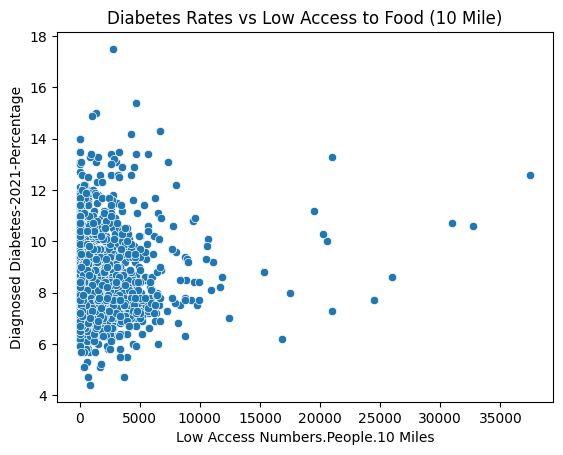

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=merged_df['Low Access Numbers.People.10 Miles'], y=merged_df['Diagnosed Diabetes-2021-Percentage'])
plt.title("Diabetes Rates vs Low Access to Food (10 Mile)")
plt.show()

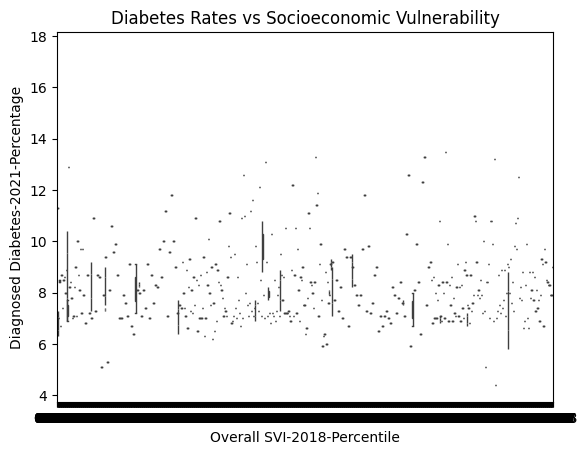

In [ ]:
sns.boxplot(x='Overall SVI-2018-Percentile', y='Diagnosed Diabetes-2021-Percentage', data=merged_df)
plt.title("Diabetes Rates vs Socioeconomic Vulnerability")
plt.show()

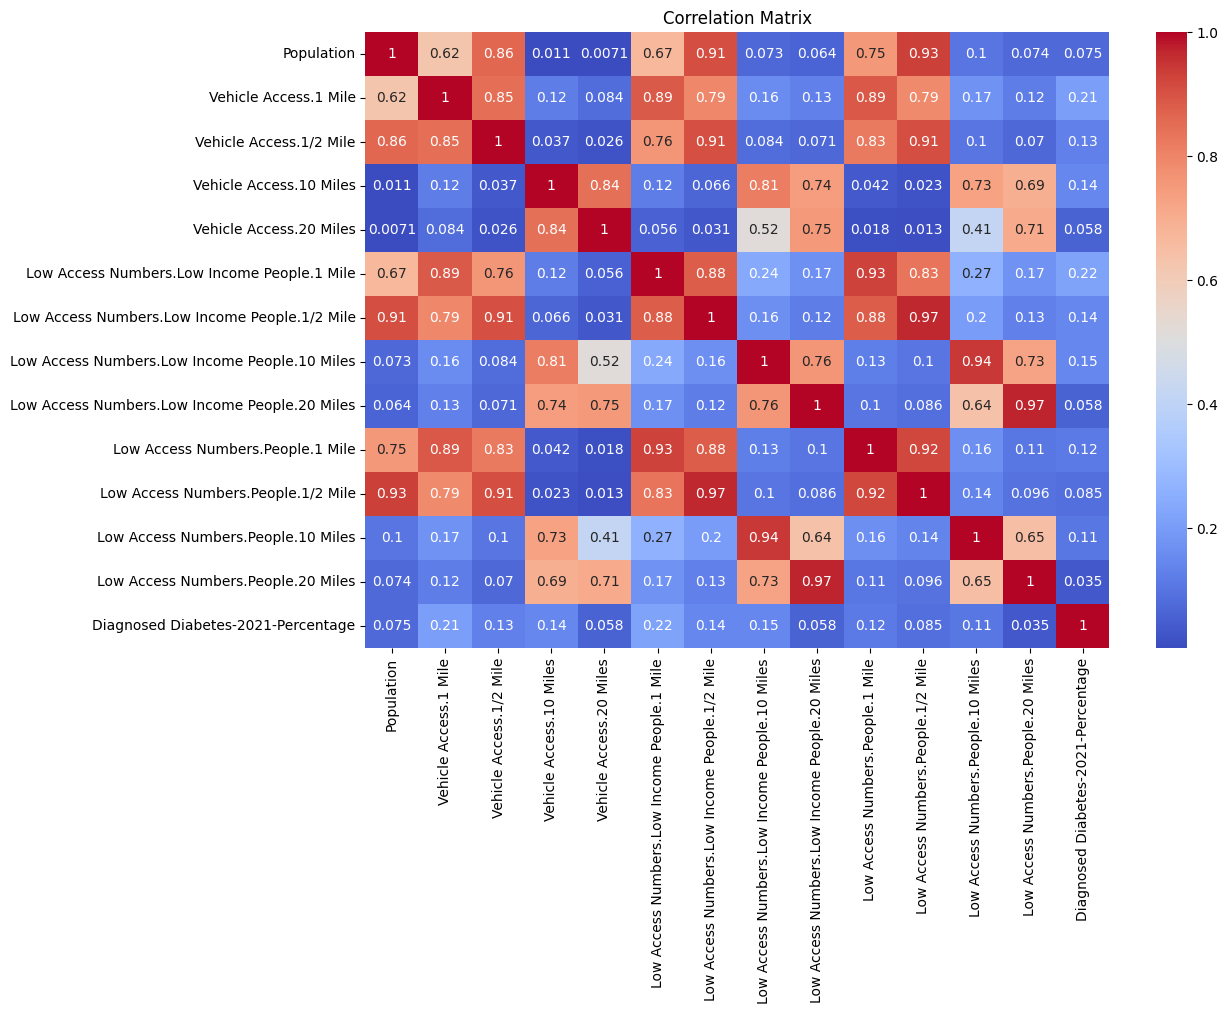

In [ ]:
# Select only numeric columns for correlation
numeric_df = merged_df.select_dtypes(include=['number'])

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Drop redundant columns
columns_to_drop = ['State_x', 'State_y', 'Zip Code']
X = merged_df.drop(columns=columns_to_drop + ['Diagnosed Diabetes-2021-Percentage']) # Define X here

# Check for non-numeric columns and rows with non-numeric data
print(X.dtypes)
print(X.isin(['No Data']).sum())  # Check how many instances of 'No Data'

# Option 2: Drop rows with NaN values (if appropriate)
X.dropna(inplace=True)

County                                            object
Population                                         int64
Vehicle Access.1 Mile                            float64
Vehicle Access.1/2 Mile                          float64
Vehicle Access.10 Miles                          float64
Vehicle Access.20 Miles                          float64
Low Access Numbers.Low Income People.1 Mile      float64
Low Access Numbers.Low Income People.1/2 Mile    float64
Low Access Numbers.Low Income People.10 Miles    float64
Low Access Numbers.Low Income People.20 Miles    float64
Low Access Numbers.People.1 Mile                 float64
Low Access Numbers.People.1/2 Mile               float64
Low Access Numbers.People.10 Miles               float64
Low Access Numbers.People.20 Miles               float64
Overall SVI-2018-Percentile                       object
dtype: object
County                                           0
Population                                       0
Vehicle Access.1 Mile        

In [ ]:
# Check if any columns contain non-numeric values
print(X.dtypes)

# Try converting all columns to numeric to identify issues
X = X.apply(pd.to_numeric, errors='coerce')

# Check again for any non-numeric columns after coercion
print(X.dtypes)

# Check for any NaN values after coercion
print(X.isnull().sum())

County                                            object
Population                                         int64
Vehicle Access.1 Mile                            float64
Vehicle Access.1/2 Mile                          float64
Vehicle Access.10 Miles                          float64
Vehicle Access.20 Miles                          float64
Low Access Numbers.Low Income People.1 Mile      float64
Low Access Numbers.Low Income People.1/2 Mile    float64
Low Access Numbers.Low Income People.10 Miles    float64
Low Access Numbers.Low Income People.20 Miles    float64
Low Access Numbers.People.1 Mile                 float64
Low Access Numbers.People.1/2 Mile               float64
Low Access Numbers.People.10 Miles               float64
Low Access Numbers.People.20 Miles               float64
Overall SVI-2018-Percentile                       object
dtype: object
County                                           float64
Population                                         int64
Vehicle Access.1 

In [ ]:
# Check unique values in the problematic column
print(merged_df['Overall SVI-2018-Percentile'].unique())

# Convert the 'Overall SVI-2018-Percentile' column to numeric, forcing errors to NaN
merged_df['Overall SVI-2018-Percentile'] = pd.to_numeric(merged_df['Overall SVI-2018-Percentile'], errors='coerce')

# Check if there are any NaN values in this column
print(merged_df['Overall SVI-2018-Percentile'].isnull().sum())

# Replace NaN with the column mean (or another method)
merged_df['Overall SVI-2018-Percentile'].fillna(merged_df['Overall SVI-2018-Percentile'].mean(), inplace=True)


['0.8564' '0.9182' '0.8025' ... '0.9895' '0.9987' '0.9538']
1


<ipython-input-14-57c353f8fcd1>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Overall SVI-2018-Percentile'].fillna(merged_df['Overall SVI-2018-Percentile'].mean(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop redundant columns
columns_to_drop = ['County', 'State_x', 'State_y', 'Zip Code']
X = merged_df.drop(columns=columns_to_drop + ['Diagnosed Diabetes-2021-Percentage'])

# Encode target variable
y = merged_df['Diagnosed Diabetes-2021-Percentage']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
!pip install --upgrade scikit-learn

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming model is already trained
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manually calculate RMSE
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

RMSE: 1.2940202462586408
R^2 Score: 0.3010243715838634


In [ ]:
# Create interaction terms or polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)  # degree 2 for quadratic features
X_poly = poly.fit_transform(X)

# Scale polynomial features
X_scaled_poly = scaler.fit_transform(X_poly)

# Train your model on this new set of features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Make predictions
y_pred_rf = rf.predict(X_scaled)

# Evaluate the model
rmse_rf = mean_squared_error(y, y_pred_rf, squared=False)
r2_rf = r2_score(y, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Random Forest RMSE: 0.4734206724529483
Random Forest R² Score: 0.9002985444920395


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
print(X.columns)

Index(['Population', 'Vehicle Access.1 Mile', 'Vehicle Access.1/2 Mile',
       'Vehicle Access.10 Miles', 'Vehicle Access.20 Miles',
       'Low Access Numbers.Low Income People.1 Mile',
       'Low Access Numbers.Low Income People.1/2 Mile',
       'Low Access Numbers.Low Income People.10 Miles',
       'Low Access Numbers.Low Income People.20 Miles',
       'Low Access Numbers.People.1 Mile',
       'Low Access Numbers.People.1/2 Mile',
       'Low Access Numbers.People.10 Miles',
       'Low Access Numbers.People.20 Miles', 'Overall SVI-2018-Percentile'],
      dtype='object')


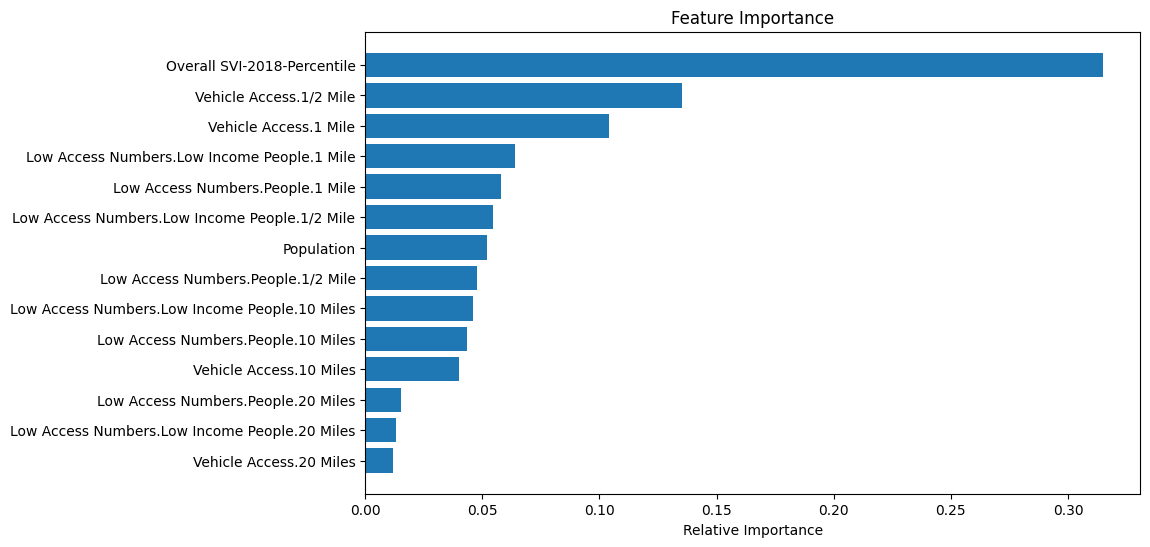

In [ ]:
# Assuming you know the feature names
feature_names = ['Population', 'Vehicle Access.1 Mile', 'Vehicle Access.1/2 Mile', 'Vehicle Access.10 Miles',
                 'Vehicle Access.20 Miles', 'Low Access Numbers.Low Income People.1 Mile', 'Low Access Numbers.Low Income People.1/2 Mile',
                 'Low Access Numbers.Low Income People.10 Miles', 'Low Access Numbers.Low Income People.20 Miles', 'Low Access Numbers.People.1 Mile',
                 'Low Access Numbers.People.1/2 Mile', 'Low Access Numbers.People.10 Miles', 'Low Access Numbers.People.20 Miles',
                 'Overall SVI-2018-Percentile']

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

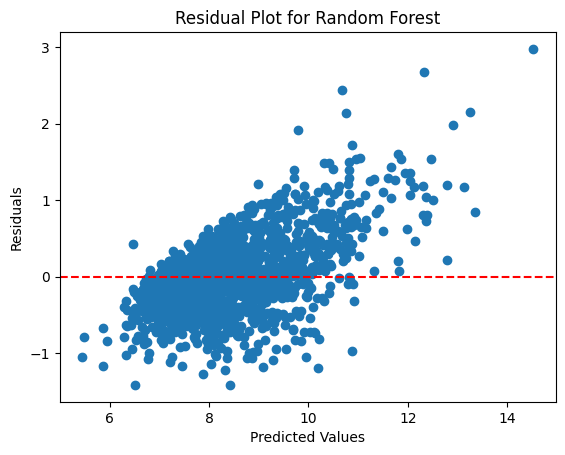

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y - y_pred_rf

# Plot residuals
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_scaled, y)

# Make predictions
y_pred_gb = gb.predict(X_scaled)

# Evaluate the model
rmse_gb = mean_squared_error(y, y_pred_gb, squared=False)
r2_gb = r2_score(y, y_pred_gb)

print(f"Gradient Boosting RMSE: {rmse_gb}")
print(f"Gradient Boosting R² Score: {r2_gb}")

Gradient Boosting RMSE: 1.0013245776884339
Gradient Boosting R² Score: 0.5539774515630906


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_scaled, y)

# Get the best parameters and model
print(f"Best Parameters: {grid_search_rf.best_params_}")

# Evaluate the best model
y_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_scaled)
rmse_rf_grid = mean_squared_error(y, y_pred_rf_grid, squared=False)
r2_rf_grid = r2_score(y, y_pred_rf_grid)

print(f"Optimized Random Forest RMSE: {rmse_rf_grid}")
print(f"Optimized Random Forest R² Score: {r2_rf_grid}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest RMSE: 0.8501965980612105
Optimized Random Forest R² Score: 0.6784520180523099


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid for Gradient Boosting
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                      param_distributions=param_dist,
                                      n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search_gb.fit(X_scaled, y)

# Get the best parameters and model
print(f"Best Parameters: {random_search_gb.best_params_}")

# Evaluate the best model
y_pred_gb_random = random_search_gb.best_estimator_.predict(X_scaled)
rmse_gb_random = mean_squared_error(y, y_pred_gb_random, squared=False)
r2_gb_random = r2_score(y, y_pred_gb_random)

print(f"Optimized Gradient Boosting RMSE: {rmse_gb_random}")
print(f"Optimized Gradient Boosting R² Score: {r2_gb_random}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.05}
Optimized Gradient Boosting RMSE: 1.0959660417032178
Optimized Gradient Boosting R² Score: 0.4656802119452942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Cross-validation for Random Forest - RMSE
cv_scores_rf_mse = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42),
                                   X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert MSE to RMSE
rmse_rf_cv = (-cv_scores_rf_mse.mean())**0.5
print(f"Cross-validated Random Forest RMSE: {rmse_rf_cv}")

# Cross-validation for Random Forest - R-squared
cv_scores_rf_r2 = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42),
                                  X_scaled, y, cv=5, scoring='r2')

# Mean R-squared score
r2_rf_cv = cv_scores_rf_r2.mean()
print(f"Cross-validated Random Forest R-squared: {r2_rf_cv}")


Cross-validated Random Forest RMSE: 1.2782640495338
Cross-validated Random Forest R-squared: 0.26816490797889614


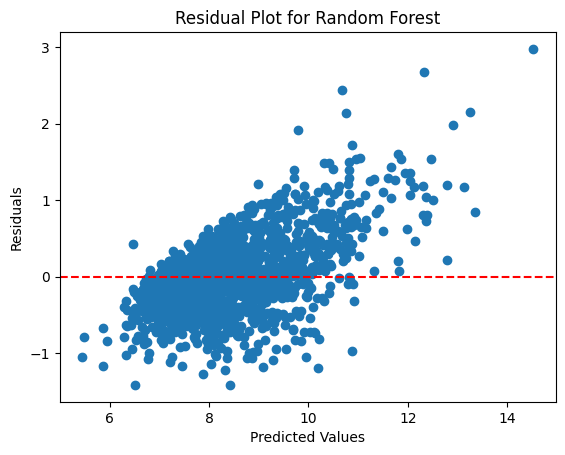

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y - y_pred_rf

# Plot residuals
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()
